<a href="https://colab.research.google.com/github/hache22/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Script en Python realiza un proceso de clusterizacion sobre datos de casas en la cuidad de California, Estados Unidos.
El mismo toma como set de datos un archivo.csv que contiene la informacion relevante de las mismas.

In [1]:
import pandas as pd

datos = pd.read_csv("Casas-California.csv")

In [2]:
datos.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


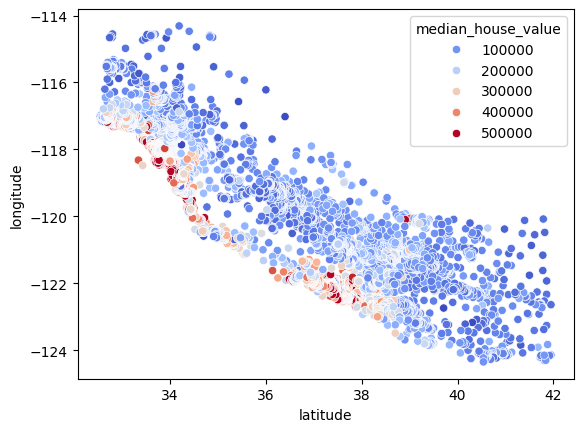

In [6]:
# grafico que muestra un mapa basado en el precio de las casas
import seaborn as sb

grafico= sb.scatterplot(x="latitude" ,
                        y="longitude" ,
                        data=datos ,
                        palette="coolwarm",
                        hue="median_house_value")


TypeError: cannot convert the series to <class 'float'>

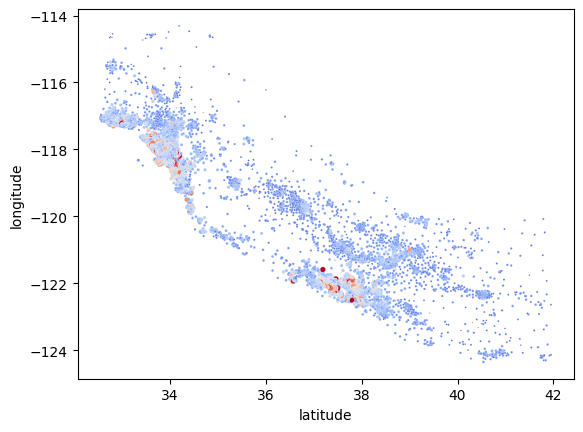

In [7]:
# grafico que muestra un mapa basado en la media de ingreso por casa
import seaborn as sb

grafico= sb.scatterplot(x="latitude" ,
                        y="longitude" ,
                        data=datos ,
                        palette="coolwarm",
                        s=datos["median_income"],
                        hue="median_income")

In [8]:
# data frame para entrenar al modelo utilizando las columnas descritas
datos_loc = datos.loc[:, ["latitude" , "longitude" , "median_income"]]

In [9]:
from sklearn.cluster import KMeans

X= datos_loc

# parametros que recibe : init(str) , max_iter(int) , verbose(0 - 1) , random_state(any | none)
modelo = KMeans(n_clusters=6)

predicciones = modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# cantidad de registros de la tabla

predicciones.shape

(20640,)

In [11]:
# agregando columnas al data frame original

X["Segmento_Economico"] = predicciones



In [12]:
# 0 -> personas con menos ingresos
# 1 -> personas con ingresos medios
# 2 -> personas con altos ingresos

X["Segmento_Economico"].value_counts()

1    6987
0    4848
2    3866
3    2799
5    1681
4     459
Name: Segmento_Economico, dtype: int64

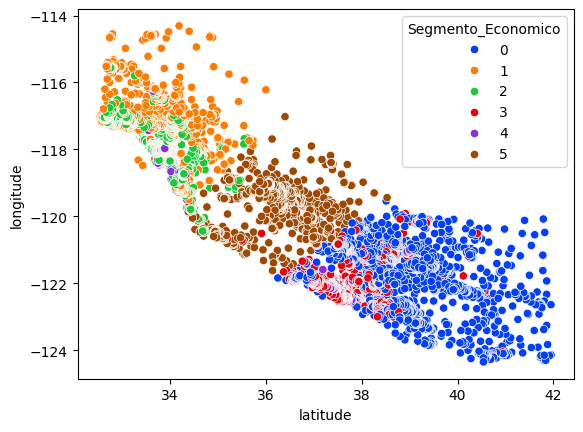

In [13]:
import seaborn as sb

grafico= sb.scatterplot(x="latitude" ,
                        y="longitude" ,
                        data=X ,
                        palette="bright",
                        hue="Segmento_Economico")

<Axes: xlabel='Segmento_Economico', ylabel='count'>

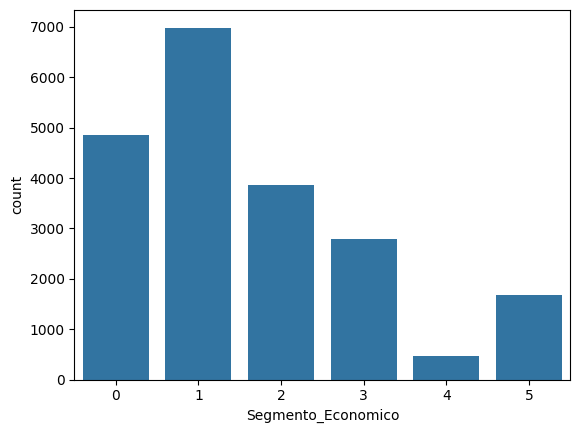

In [14]:
sb.countplot(x="Segmento_Economico" , data=X)

In [15]:
# creando grupo para realizar un promedio de quienes son los que mas ganan
# realizar un conteo de los 6 grupos economicos y mostrar un promedio de ingresos
X.groupby(["Segmento_Economico"])["median_income"].mean()

Segmento_Economico
0     2.814256
1     2.868666
2     5.507577
3     5.502835
4    10.946702
5     2.667760
Name: median_income, dtype: float64

In [17]:
# agregando columna población por casa
poblacion_por_casa =  datos["population"] / datos["households"]
X["pop_per_household"] = poblacion_por_casa
promedio_casa = X["pop_per_household"].mean()


In [18]:
# clusterizacion

modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)
predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [19]:
X.groupby(["Segmento_Economico"])["pop_per_household"].mean()

Segmento_Economico
0    2.711489
1    3.124867
2    2.931691
3    3.126461
4    5.722429
5    3.383758
Name: pop_per_household, dtype: float64

<Axes: xlabel='pop_per_household', ylabel='count'>

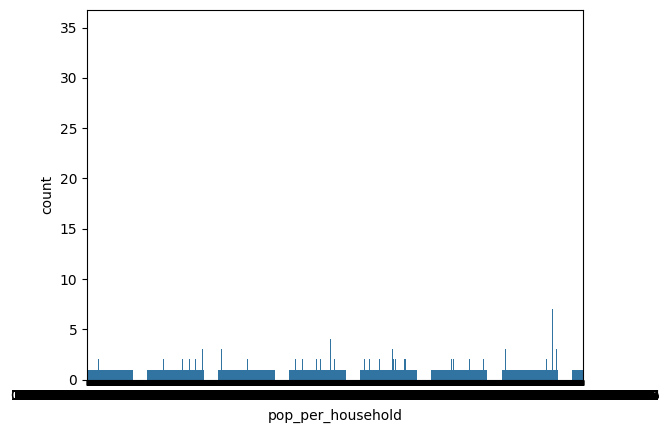

In [20]:
sb.countplot(x="pop_per_household" , data=X)